In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler




data=pd.read_csv("/Users/Tara/Downloads/Global_Mobility_Report (1).csv")


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
data.head

<bound method NDFrame.head of         country_region_code        country_region       sub_region_1  \
0                        AE  United Arab Emirates                NaN   
1                        AE  United Arab Emirates                NaN   
2                        AE  United Arab Emirates                NaN   
3                        AE  United Arab Emirates                NaN   
4                        AE  United Arab Emirates                NaN   
...                     ...                   ...                ...   
2356279                  ZW              Zimbabwe  Midlands Province   
2356280                  ZW              Zimbabwe  Midlands Province   
2356281                  ZW              Zimbabwe  Midlands Province   
2356282                  ZW              Zimbabwe  Midlands Province   
2356283                  ZW              Zimbabwe  Midlands Province   

        sub_region_2 metro_area iso_3166_2_code  census_fips_code        date  \
0                NaN    

In [3]:
data=data[data.country_region=="United States"]

In [4]:
data.head

<bound method NDFrame.head of         country_region_code country_region sub_region_1   sub_region_2  \
1794395                  US  United States          NaN            NaN   
1794396                  US  United States          NaN            NaN   
1794397                  US  United States          NaN            NaN   
1794398                  US  United States          NaN            NaN   
1794399                  US  United States          NaN            NaN   
...                     ...            ...          ...            ...   
2332432                  US  United States      Wyoming  Weston County   
2332433                  US  United States      Wyoming  Weston County   
2332434                  US  United States      Wyoming  Weston County   
2332435                  US  United States      Wyoming  Weston County   
2332436                  US  United States      Wyoming  Weston County   

        metro_area iso_3166_2_code  census_fips_code        date  \
1794395      

In [5]:
data=data[["country_region", "sub_region_1", "date", 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', "workplaces_percent_change_from_baseline"]]

In [6]:
data.head

<bound method NDFrame.head of         country_region sub_region_1        date  \
1794395  United States          NaN  2020-02-15   
1794396  United States          NaN  2020-02-16   
1794397  United States          NaN  2020-02-17   
1794398  United States          NaN  2020-02-18   
1794399  United States          NaN  2020-02-19   
...                ...          ...         ...   
2332432  United States      Wyoming  2020-08-31   
2332433  United States      Wyoming  2020-09-01   
2332434  United States      Wyoming  2020-09-02   
2332435  United States      Wyoming  2020-09-03   
2332436  United States      Wyoming  2020-09-04   

         retail_and_recreation_percent_change_from_baseline  \
1794395                                                6.0    
1794396                                                7.0    
1794397                                                6.0    
1794398                                                0.0    
1794399                                   

In [7]:
data.dropna(axis=0, how="any", inplace=True)

<ipython-input-7-a41fd17ba840>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, how="any", inplace=True)


In [8]:
data.head


<bound method NDFrame.head of         country_region sub_region_1        date  \
1794598  United States      Alabama  2020-02-15   
1794599  United States      Alabama  2020-02-16   
1794600  United States      Alabama  2020-02-17   
1794601  United States      Alabama  2020-02-18   
1794602  United States      Alabama  2020-02-19   
...                ...          ...         ...   
2331980  United States      Wyoming  2020-04-01   
2331981  United States      Wyoming  2020-04-02   
2331982  United States      Wyoming  2020-04-03   
2331983  United States      Wyoming  2020-04-04   
2331984  United States      Wyoming  2020-04-05   

         retail_and_recreation_percent_change_from_baseline  \
1794598                                                5.0    
1794599                                                0.0    
1794600                                                3.0    
1794601                                               -4.0    
1794602                                   

In [17]:
# scaler=StandardScaler()
# data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]=scaler.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]) 

# data


columns_to_normalize=["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline"]
for i in columns_to_normalize:
    max=data[i].max()
    min=data[i].min()
    new_str=i+"_norm"
    data[new_str]=(data[i]-min)/(max-min)


<ipython-input-17-d6757353095d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_str]=(data[i]-min)/(max-min)


In [10]:
# from sklearn.decomposition import PCA
# pca=PCA(n_components=4)
# principal_components = pca.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]])
# pca_data = pd.DataFrame(data = principal_components, columns = ['PC 1', 'PC 2', "PC 3", "PC 4"])
# print(pca.explained_variance_ratio_)
# print("0.98260139 of the variance in the data is represented by these 4 principle components")
# pca_data



In [11]:
# factor loadings are correlations of features and components- trying to find the latent factors

# loadings = pd.DataFrame( pca.components_, columns=["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]).T
# loadings


In [12]:
# print("'loadings' are also eigenvectors")
# print("Greatest contributors to PC1: retail, grocery, transit, workplaces")
# print("Greatest contributors to PC2: grocery, residential")
# print("Greatest contributor to PC3: transit")
# print("Greatest contributors to PC4: retail")

# # https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html
# # could also do color matrix https://towardsdatascience.com/understand-your-data-with-principle-component-analysis-pca-and-discover-underlying-patterns-d6cadb020939

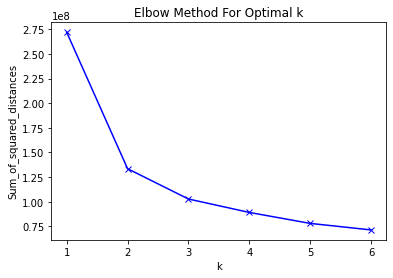

In [18]:
# find OPTIMAL value for kmeans
from sklearn.cluster import KMeans
data_kmeans = pd.DataFrame(data)
Sum_of_squared_distances = []
K = range(1,7)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline"]])
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()






In [210]:
print(type(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline"]]))

<class 'pandas.core.frame.DataFrame'>


In [25]:
# run KMeans
kmeans = KMeans(n_clusters=5)
y = kmeans.fit_predict(data[["retail_and_recreation_percent_change_from_baseline_norm", "grocery_and_pharmacy_percent_change_from_baseline_norm", "transit_stations_percent_change_from_baseline_norm", "workplaces_percent_change_from_baseline_norm"]])
data['Cluster'] = y
# pca_data["State"]=data["sub_region_1"]
data







<ipython-input-25-25482a906480>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = y


,country_region,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,Cluster,retail_and_recreation_percent_change_from_baseline_norm,grocery_and_pharmacy_percent_change_from_baseline_norm,transit_stations_percent_change_from_baseline_norm,workplaces_percent_change_from_baseline_norm
1794598,United States,Alabama,2020-02-15,5.0,2.0,7.0,2.0,2,0.479452,0.357414,0.315287,0.734375
1794599,United States,Alabama,2020-02-16,0.0,-2.0,3.0,-1.0,2,0.456621,0.342205,0.302548,0.710938
1794600,United States,Alabama,2020-02-17,3.0,0.0,7.0,-17.0,1,0.470320,0.349810,0.315287,0.585938
1794601,United States,Alabama,2020-02-18,-4.0,-3.0,-1.0,1.0,2,0.438356,0.338403,0.289809,0.726562
1794602,United States,Alabama,2020-02-19,4.0,1.0,4.0,1.0,2,0.474886,0.353612,0.305732,0.726562
...,...,...,...,...,...,...,...,...,...,...,...,...
2331980,United States,Wyoming,2020-04-01,-20.0,4.0,9.0,-31.0,1,0.365297,0.365019,0.321656,0.476562
2331981,United States,Wyoming,2020-04-02,-34.0,-5.0,11.0,-31.0,0,0.301370,0.330798,0.328025,0.476562
2331982,United States,Wyoming,2020-04-03,-24.0,6.0,19.0,-26.0,1,0.347032,0.372624,0.353503,0.515625
2331983,United States,Wyoming,2020-04-04,-32.0,2.0,12.0,-20.0,0,0.310502,0.357414,0.331210,0.562500


In [212]:
# ls_to_append=[]
# for index, row in data.iterrows():
#     ls_to_append.append(row["sub_region_1"])

# # ls_to_append


In [213]:
# series_to_add_to_pca_data=pd.Series(ls_to_append)
# pca_data["State"]=series_to_add_to_pca_data
# pca_data


,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,2.354391,-1.143334,0.099191,0.097233,1,Alabama
1,1.827137,-1.202345,0.203013,0.095342,1,Alabama
2,1.404286,-0.310379,0.440112,0.362566,1,Alabama
3,1.615274,-1.339801,0.121944,-0.034157,1,Alabama
4,2.153825,-1.136191,0.070387,0.131507,1,Alabama
...,...,...,...,...,...,...
156599,0.823165,0.676877,0.662480,-0.467199,4,Wyoming
156600,1.647464,1.454389,1.307348,-0.969484,3,Wyoming
156601,1.154456,0.829655,0.891517,-0.393623,3,Wyoming
156602,1.696530,1.056413,1.665581,-0.877865,3,Wyoming


In [214]:
# pca_data.Cluster.unique()

array([1, 3, 4, 0, 2], dtype=int32)

In [26]:
c0={}
c1={}
c2={}
c3={}
c4={}
list_of_clusters=[c0,c1,c2,c3,c4]
for index, row in data.iterrows():
    for i in range(0,5):
        if row["Cluster"]==i:
            if row["sub_region_1"] in list_of_clusters[i]:
                list_of_clusters[i][row["sub_region_1"]]+=1
            else:
                list_of_clusters[i][row["sub_region_1"]]=1
                
                
print(list_of_clusters)

[{'Alabama': 519, 'Alaska': 85, 'Arizona': 490, 'Arkansas': 364, 'California': 1521, 'Colorado': 387, 'Connecticut': 179, 'Delaware': 93, 'District of Columbia': 27, 'Florida': 2022, 'Georgia': 878, 'Hawaii': 87, 'Idaho': 102, 'Illinois': 563, 'Indiana': 419, 'Iowa': 302, 'Kansas': 339, 'Kentucky': 358, 'Louisiana': 771, 'Maine': 101, 'Maryland': 375, 'Massachusetts': 312, 'Michigan': 368, 'Minnesota': 295, 'Mississippi': 413, 'Missouri': 489, 'Montana': 132, 'Nebraska': 226, 'Nevada': 137, 'New Hampshire': 67, 'New Jersey': 557, 'New Mexico': 632, 'New York': 927, 'North Carolina': 933, 'North Dakota': 239, 'Ohio': 694, 'Oklahoma': 307, 'Oregon': 373, 'Pennsylvania': 780, 'Rhode Island': 106, 'South Carolina': 549, 'South Dakota': 82, 'Tennessee': 555, 'Texas': 2450, 'Utah': 168, 'Vermont': 115, 'Virginia': 1005, 'Washington': 488, 'West Virginia': 141, 'Wisconsin': 397, 'Wyoming': 143}, {'Alabama': 1429, 'Alaska': 226, 'Arizona': 469, 'Arkansas': 1239, 'California': 875, 'Colorado': 

In [29]:
states_clusters={}
for index, row in data.iterrows():
    if row["sub_region_1"] not in states_clusters:
        state_dict={}
        for i in range(0,5):
            if row["sub_region_1"] in list_of_clusters[i]:
                state_dict[i]=list_of_clusters[i][row["sub_region_1"]]
        print(state_dict)
        state_dict_vals=list(state_dict.values())
        state_dict_keys=list(state_dict.keys())
        state_vals_max=max(state_dict_vals)
        max_ind=state_dict_vals.index(state_vals_max)
        max_cluster=state_dict_keys[max_ind]
        states_clusters[row["sub_region_1"]]=max_cluster
print(states_clusters)
    

{0: 519, 1: 1429, 2: 799, 3: 153, 4: 663}


TypeError: 'numpy.float64' object is not callable

In [218]:
clusters_and_their_states={1:[], 2:[], 3:[], 4:[], 0:[]}

for i in states_clusters.keys():
    for j in range(0,5):
        if states_clusters[i]==j:
            clusters_and_their_states[j].append(i)


print(clusters_and_their_states)


{1: [], 2: ['District of Columbia', 'Hawaii', 'Massachusetts'], 3: ['Idaho', 'Iowa', 'Maine', 'Montana', 'South Dakota', 'Wyoming'], 4: ['Alabama', 'Alaska', 'Arkansas', 'Connecticut', 'Georgia', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi', 'Missouri', 'Nebraska', 'New Hampshire', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin'], 0: ['Arizona', 'California', 'Colorado', 'Delaware', 'Florida', 'Maryland', 'Minnesota', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'Rhode Island']}


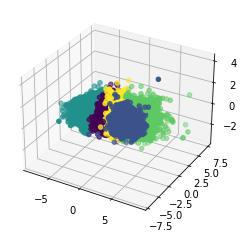

In [219]:
# 4d plot for april kmeans
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = pca_data["PC 1"]
y = pca_data["PC 2"]
z = pca_data["PC 3"]
z = pca_data["PC 4"]

categories = np.unique(pca_data["Cluster"])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  
pca_data["Color"] = pca_data["Cluster"].apply(lambda x: colordict[x])

img=ax.scatter(x,y,z, c=pca_data.Color)


# fig.colorbar(img)
plt.show()


In [33]:
num=0
pca_2=pd.DataFrame(columns=['Cluster', 'retail_and_recreation_percent_change_from_baseline_norm', "grocery_and_pharmacy_percent_change_from_baseline_norm", "transit_stations_percent_change_from_baseline_norm", "workplaces_percent_change_from_baseline_norm"])
for index, row in data.iterrows():
    if num%15==0:
        pca_2=pca_2.append({'Cluster':row["Cluster"], 'retail_and_recreation_percent_change_from_baseline_norm':row["retail_and_recreation_percent_change_from_baseline_norm"], "grocery_and_pharmacy_percent_change_from_baseline_norm": row["grocery_and_pharmacy_percent_change_from_baseline_norm"], "transit_stations_percent_change_from_baseline_norm":row["transit_stations_percent_change_from_baseline_norm"], "workplaces_percent_change_from_baseline_norm":row["workplaces_percent_change_from_baseline_norm"]
 }, ignore_index=True)
    num+=1
pca_2.head







<bound method NDFrame.head of        Cluster  retail_and_recreation_percent_change_from_baseline_norm  \
0          2.0                                           0.479452         
1          2.0                                           0.529680         
2          2.0                                           0.447489         
3          4.0                                           0.292237         
4          4.0                                           0.369863         
...        ...                                                ...         
11735      2.0                                           0.410959         
11736      3.0                                           0.141553         
11737      2.0                                           0.506849         
11738      2.0                                           0.520548         
11739      0.0                                           0.292237         

       grocery_and_pharmacy_percent_change_from_baseline_norm  \
0   

In [ ]:
pca_2

In [221]:
clusters_and_their_states.values()

dict_values([[], ['District of Columbia', 'Hawaii', 'Massachusetts'], ['Idaho', 'Iowa', 'Maine', 'Montana', 'South Dakota', 'Wyoming'], ['Alabama', 'Alaska', 'Arkansas', 'Connecticut', 'Georgia', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi', 'Missouri', 'Nebraska', 'New Hampshire', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin'], ['Arizona', 'California', 'Colorado', 'Delaware', 'Florida', 'Maryland', 'Minnesota', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'Rhode Island']])

In [225]:
vals=list(clusters_and_their_states.values())
keys=list(clusters_and_their_states.keys())
for index, row in pca_2.iterrows():
    for i in range(len(vals)):
        if row["State"] in vals[i]:
            pca_2.at[index, "Cluster"]= keys[i]
pca_2
            
            
    

,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,2.354391,-1.143334,0.099191,1.097233,4,Alabama
1,1.356098,-1.419918,0.275231,0.946645,4,Alabama
2,2.286376,-0.912246,0.097939,1.196410,4,Alabama
3,3.224867,-0.641417,0.168631,1.140671,4,Alabama
4,2.563649,-0.977189,0.105947,1.174063,4,Alabama
...,...,...,...,...,...,...
31316,-0.422840,0.501630,0.720207,0.271833,3,Wyoming
31317,-1.092886,-0.184079,0.789089,0.692719,3,Wyoming
31318,-0.017525,0.734330,0.688106,0.319754,3,Wyoming
31319,0.547260,1.053729,0.881573,0.369614,3,Wyoming


In [36]:
# 5d plot for  kmeans




import plotly
import plotly.graph_objs as go

#Set marker properties
markercolor = pca_2["Cluster"]
markersize = (pca_2['retail_and_recreation_percent_change_from_baseline_norm'])*5

#Make Plotly figure
fig1 = go.Scatter3d(x=pca_2["grocery_and_pharmacy_percent_change_from_baseline_norm"],
                    y=pca_2["transit_stations_percent_change_from_baseline_norm"],
                    z=pca_2["workplaces_percent_change_from_baseline_norm"],
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=0.9,
                                reversescale=True,colorscale='Blues'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="grocery_and_pharmacy_percent_change_from_baseline_norm"),
                                yaxis=dict( title="transit_stations_percent_change_from_baseline_norm"),
                                zaxis=dict(title="workplaces_percent_change_from_baseline_norm")),
                    )

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True, filename=("Google Mobility KMeans.html")
                   )


'Google Mobility KMeans.html'